# The Land Change Monitoring, Assessment, and Projection (LCMAP) data direct access

## This code was adapted from USGS LCMAP direct access python code ( https://code.usgs.gov/lcmap/1a_lcmap_direct_access) to directly download user defined mosaiced LCMAP product for any for region of interest. In addition to accessing the row data, the below website provides additional resources on further processing of data including quality filtering, masking, and reprojection.

### (https://www.usgs.gov/special-topics/lcmap/tutorials) 

In [1]:
# Import Packages
import rasterio as rio
import rasterio.mask
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
import matplotlib.colors as clr
import matplotlib.patches as mpatches
import numpy as np
import time
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
b_url = "https://edcintl.cr.usgs.gov/downloads/sciweb1/shared/lcmap/public/full_extent_downloads/"  # Base URL for LCMAP data

In [13]:
roi_path = "/data-store/iplant/home/nilangakoon/LCMAP/California_County_Boundaries_8408091426384550881/cnty19_1.shp"  #4 Define the ROI used to extract a subset of LCMAP data

In [4]:
# Region shortname and longname
region_dict = {'CU': 'conus',
               'HI': 'hawaii'}

# Available versions by region
rv_dict = {'CU':['version_13', 'V13'],
           'HI': ['version_10', 'V10']}

# Product shortname and longname
prod_dict = {'LCPRI': 'primary-landcover',
             'LCSEC': 'secondary-landcover',
             'LCPCONF': 'primary-confidence',
             'LCSCONF': 'secondary-confidence',
             'LCACHG': 'cover-change',
             'SCTIME': 'change-day',
             'SCMAG': 'change-magnitude',
             'SCLAST': 'spectral-lastchange',
             'SCSTAB': 'spectral-stability',
             'SCMQA': 'model-quality'}

In [5]:
# Inputs: Define the desired Region, Product, and Year
region = 'CU'      #1 or HI for Hawaii
product = 'LCPRI'  #2 See LUT above for additional products
year = '1985'      #3 1985-2021 available for CONUS, 2000-2020 available for HI

In [6]:
# Construct the URL in two parts for readability
prod_url = f"LCMAP_{region}_{year}_{rv_dict[region][1]}_{product}"
print(prod_url)

LCMAP_CU_1985_V13_LCPRI


In [7]:
url = f"{b_url}{rv_dict[region][0]}/{prod_dict[product]}_{region_dict[region]}_year_data/{prod_url}/{prod_url}.tif"
print(url)

https://edcintl.cr.usgs.gov/downloads/sciweb1/shared/lcmap/public/full_extent_downloads/version_13/primary-landcover_conus_year_data/LCMAP_CU_1985_V13_LCPRI/LCMAP_CU_1985_V13_LCPRI.tif


In [14]:
%%time 
lcmap = rio.open(url)

CPU times: user 3.05 ms, sys: 166 µs, total: 3.22 ms
Wall time: 2.86 ms


In [15]:
lcmap.crs.to_proj4()

'+proj=aea +lat_0=23 +lon_0=-96 +lat_1=29.5 +lat_2=45.5 +x_0=0 +y_0=0 +ellps=IAU76 +units=m +no_defs=True'

In [16]:
color = lcmap.colormap(1)

In [58]:
ROIs = gpd.read_file(roi_path)
ROIs

,COUNTY_NAM,COUNTY_ABB,COUNTY_NUM,COUNTY_COD,COUNTY_FIP,ISLAND,GlobalID,geometry
0,Alameda,ALA,1,01,001,None,e6f92268-d2dd-4cfb-8b79-5b4b2f07c559,"POLYGON ((-13611173.233 4566017.932, -13611101..."
1,Alpine,ALP,2,02,003,None,870479b2-480a-494b-8352-ad60578839c1,"POLYGON ((-13312326.921 4680816.110, -13314594..."
2,Amador,AMA,3,03,005,None,4f45b3a6-be10-461c-8945-6b2aaa7119f6,"POLYGON ((-13366405.546 4679183.529, -13366428..."
3,Butte,BUT,4,04,007,None,44fba680-aecc-4e04-a499-29d69affbd4a,"POLYGON ((-13478186.664 4807593.081, -13478185..."
4,Calaveras,CAL,5,05,009,None,d11ef739-4a1e-414e-bfd1-e7dcd56cd61e,"POLYGON ((-13360333.217 4641182.754, -13361541..."
...,...,...,...,...,...,...,...,...
64,Ventura,VEN,56,56,111,Channel Islands,86c2171f-d249-45a0-ac0c-40a4e6cb82e2,"POLYGON ((-13289471.165 4030300.859, -13289470..."
65,Ventura,VEN,56,56,111,Channel Islands,71e2d2ad-a83c-4f5d-bc3b-b7ad9b12f57b,"POLYGON ((-13295199.812 4030950.945, -13295197..."
66,Ventura,VEN,56,56,111,Channel Islands,d90412b1-c6af-4437-94d9-48dc3a13a64d,"POLYGON ((-13287570.139 4031059.291, -13287572..."
67,Los Angeles,LOS,19,19,037,Channel Islands,3cb33dc3-e564-4bbf-8528-866600a1f9e4,"POLYGON ((-13195691.433 3892660.579, -13195695..."


In [51]:
ROI.COUNTY_NAM[1]

'Alpine'

In [18]:
lcmap.crs.to_proj4()  # Print out LCMAP Projection

'+proj=aea +lat_0=23 +lon_0=-96 +lat_1=29.5 +lat_2=45.5 +x_0=0 +y_0=0 +ellps=IAU76 +units=m +no_defs=True'

In [19]:
ROI.crs.to_proj4()  # Print out ROI Projection

'+proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs +type=crs'

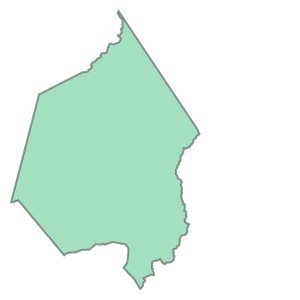

In [43]:
# ROI_reproj = ROI.to_crs(lcmap.crs)['geometry'][6]  # Reproject geometry to match source projection
# ROI_reproj

ROI_reproj = ROI.to_crs(lcmap.crs)['geometry'][1]  # Reproject geometry to match source projection
ROI_reproj

In [ ]:
ROI_reproj = ROI.to_crs(lcmap.crs)['geometry'][1]  # Reproject geometry to match source projection
ROI_reproj

In [48]:
%%time
lcmap_data, lcmap_transform = rio.mask.mask(lcmap, [ROI_reproj], crop=True)

RasterioIOError: Dataset is closed: https://edcintl.cr.usgs.gov/downloads/sciweb1/shared/lcmap/public/full_extent_downloads/version_13/primary-landcover_conus_year_data/LCMAP_CU_2021_V13_LCPRI/LCMAP_CU_2021_V13_LCPRI.tif

In [45]:
lcmap_data.shape

(1, 2155, 2219)

In [23]:
lcmap_transform

Affine(30.0, 0.0, -2268285.0,
       0.0, -30.0, 1966605.0)

In [24]:
values, counts = np.unique(lcmap_data, return_counts=True)

In [56]:
# Create a LUT of LCPRI values and long names
class_dict = {0: 'No Data', 
              1: 'Developed', 
              2: 'Cropland', 
              3: 'Grass/Shrub', 
              4: 'Tree Cover', 
              5: 'Water', 
              6: 'Wetland', 
              7: 'Ice/Snow', 
              8: 'Barren'}

count_dict = dict([(class_dict[v],c) for v,c in zip(values, counts) if v != 0])  # Define dictionary of counts by LCPRI value
count_dict

{'Developed': 3845,
 'Cropland': 4147,
 'Grass/Shrub': 1078027,
 'Tree Cover': 975245,
 'Water': 13510,
 'Wetland': 13324,
 'Ice/Snow': 1,
 'Barren': 44450}

In [26]:
roi_name = 'Alameda'  # Define a title for the visualizations

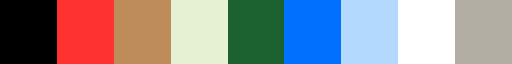

In [27]:
color_ramp = ['#%02x%02x%02x' % color[c][:3] for c in color][:9]                      # Convert rgb to hex
cmap = clr.LinearSegmentedColormap.from_list('LCPRI', color_ramp, N=len(color_ramp))  # Create a custom color ramp
cmap.set_bad('#000000')                                                               # Set bad (masked or no data) to black
cmap

In [28]:
out_file_name = f"{roi_name.replace(' ', '_').replace(',','')}_{prod_url}.tif"  # Remove any spaces or commas from roi_name

# Create output directory
out_dir = './SR/'
os.makedirs(out_dir, exist_ok=True)
out_file_path = os.path.join(out_dir, out_file_name)

In [29]:
meta = lcmap.meta
meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': 0.0,
 'width': 160000,
 'height': 105000,
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["Albers",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378140,298.256999999996,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'),
 'transform': Affine(30.0, 0.0, -2415585.0,
        0.0, -30.0, 3314805.0)}

In [30]:
# Use the lcmap_data array to define the updated width and height, and use the geotransform provided from rasterio.mask()
meta.update({'width': lcmap_data.shape[2],
             'height': lcmap_data.shape[1],
             'transform': lcmap_transform})

In [31]:
with rio.open(out_file_path, 'w', **meta, compress='lzw', tiled=True, blockxsize=256, blockysize=256) as out_file:
    out_file.write(lcmap_data)
    out_file.write_colormap(1, color)    

In [32]:
# Close the LCMAP Mosaic
lcmap.close()
del lcmap

In [33]:
years = np.arange(1985, 2022, 1) 

In [46]:

out_csv = "/data-store/iplant/home/nilangakoon/LCMAP/Alpine_LCPRI.csv"
    # setting header variables
headers = ['year', 'area','percent']

In [55]:
out_csv = os.path.join("/data-store/iplant/home/nilangakoon/LCMAP/",roi_name + ".csv")
out_csv



'/data-store/iplant/home/nilangakoon/LCMAP/Alameda.csv'

In [54]:
out_csv = os.path.join("/data-store/iplant/home/nilangakoon/LCMAP/",os.join(roi_name,".csv"))

AttributeError: module 'os' has no attribute 'join'

In [87]:
for index, row in ROIs.iterrows():
    polygon = row['geometry']
    print(polygon)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [89]:
roi_name = ROIs.COUNTY_NAM[1]  # Define a title for the visualizations
print(roi_name)

Alpine


In [92]:
out_csv = os.path.join("/data-store/iplant/home/nilangakoon/LCMAP/",roi_name + ".csv")
out_csv

'/data-store/iplant/home/nilangakoon/LCMAP/Alpine.csv'

In [95]:
for i in range(1, len(ROIs)):
    roi_name = ROIs.COUNTY_NAM[i]  # Define a title for the visualizations
    print(roi_name)
    
    out_csv = os.path.join("/data-store/iplant/home/nilangakoon/LCMAP/",roi_name+".csv")
    # setting header variables
    headers = ['year', 'area','percent']
    
    with open(out_csv, "w") as f:
        f.write(','.join(headers)+'\n')
    
    for year in years:
        # Construct URL
        prod_url = f"LCMAP_{region}_{year}_{rv_dict[region][1]}_{product}"
        url = f"{b_url}{rv_dict[region][0]}/{prod_dict[product]}_{region_dict[region]}_year_data/{prod_url}/{prod_url}.tif"
        ROI_reproj = ROIs.to_crs(lcmap.crs)['geometry'][i]  # Reproject geometry to match source projection
        
    
        # Open and extract data
        with rio.open(url) as lcmap:
            lcmap_data, lcmap_transform = rio.mask.mask(lcmap, [ROI_reproj], crop=True)
            meta = lcmap.meta
    
        # Perform analysis
        values, counts = np.unique(lcmap_data, return_counts=True)
        count_dict = dict([(class_dict[v], c) for v, c in zip(values, counts) if v != 0])
        area = '{:.2f}'.format(count_dict.get('Developed', 0) * (30*30) / 1000000)  # sq. km
        percent = '{:.2f}'.format(count_dict.get('Developed', 0) / sum(count_dict.values()) * 100 if sum(count_dict.values()) > 0 else 0)  # percentage
    
        #print(f"{roi_name} had {area} sq. km of Tree Cover ({percent}%) in {year}.")
        
        # Creating pandas dataframe  
        df = pd.DataFrame({'year': [year], 'area': [area], 'percent': [percent]})
        #print(df)
    
        # Append to CSV without header, adjust index handling as needed
        df.to_csv(out_csv, mode='a', index=False, header=False)

Alpine
Alpine had 3.81 sq. km of Tree Cover (0.20%) in 1985.
Alpine had 3.77 sq. km of Tree Cover (0.20%) in 1986.
Alpine had 3.69 sq. km of Tree Cover (0.19%) in 1987.
Alpine had 3.50 sq. km of Tree Cover (0.18%) in 1988.
Alpine had 3.55 sq. km of Tree Cover (0.18%) in 1989.
Alpine had 3.61 sq. km of Tree Cover (0.19%) in 1990.
Alpine had 3.65 sq. km of Tree Cover (0.19%) in 1991.
Alpine had 3.67 sq. km of Tree Cover (0.19%) in 1992.
Alpine had 3.71 sq. km of Tree Cover (0.19%) in 1993.
Alpine had 3.74 sq. km of Tree Cover (0.20%) in 1994.
Alpine had 3.84 sq. km of Tree Cover (0.20%) in 1995.
Alpine had 3.89 sq. km of Tree Cover (0.20%) in 1996.
Alpine had 3.92 sq. km of Tree Cover (0.20%) in 1997.
Alpine had 3.95 sq. km of Tree Cover (0.21%) in 1998.
Alpine had 3.99 sq. km of Tree Cover (0.21%) in 1999.
Alpine had 4.00 sq. km of Tree Cover (0.21%) in 2000.
Alpine had 4.07 sq. km of Tree Cover (0.21%) in 2001.
Alpine had 4.09 sq. km of Tree Cover (0.21%) in 2002.
Alpine had 4.11 sq. k

In [ ]:
for i in range(1, len(ROIs)):
    roi_name = ROIs.COUNTY_NAM[i]  # Define a title for the visualizations
    print(roi_name)
    
    out_csv = os.path.join("/data-store/iplant/home/shared/iplant_esiil_summit/2024/group_06/landcover/",roi_name+"_vegetation.csv")
    # setting header variables
    headers = ['year', 'area','percent']
    
    with open(out_csv, "w") as f:
        f.write(','.join(headers)+'\n')
    
    for year in years:
        # Construct URL
        prod_url = f"LCMAP_{region}_{year}_{rv_dict[region][1]}_{product}"
        url = f"{b_url}{rv_dict[region][0]}/{prod_dict[product]}_{region_dict[region]}_year_data/{prod_url}/{prod_url}.tif"
        ROI_reproj = ROIs.to_crs(lcmap.crs)['geometry'][i]  # Reproject geometry to match source projection
        
    
        # Open and extract data
        with rio.open(url) as lcmap:
            lcmap_data, lcmap_transform = rio.mask.mask(lcmap, [ROI_reproj], crop=True)
            meta = lcmap.meta
    
        # Perform analysis
        values, counts = np.unique(lcmap_data, return_counts=True)
        count_dict = dict([(class_dict[v], c) for v, c in zip(values, counts) if v != 0])
        area = ('{:.2f}'.format(count_dict.get('Grass/Shrub', 0) * (30*30) / 1000000) + '{:.2f}'.format(count_dict.get('Tree Cover', 0) * (30*30) / 1000000))  # sq. km
        percent = ( '{:.2f}'.format(count_dict.get('Grass/Shrub', 0) / sum(count_dict.values()) * 100 if sum(count_dict.values()) > 0 else 0)  # percentage
    
        #print(f"{roi_name} had {area} sq. km of Tree Cover ({percent}%) in {year}.")
        
        # Creating pandas dataframe  
        df = pd.DataFrame({'year': [year], 'area': [area], 'percent': [percent]})
        #print(df)
    
        # Append to CSV without header, adjust index handling as needed
        df.to_csv(out_csv, mode='a', index=False, header=False)

In [ ]:
for i in range(1, len(ROIs)):
    roi_name = ROIs.COUNTY_NAM[i]  # Define a title for the visualizations
    print(roi_name)
    
    out_csv = os.path.join("/data-store/iplant/home/shared/iplant_esiil_summit/2024/group_06/landcover/",roi_name+"_tree_grass.csv")
    # setting header variables
    headers = ['year', 'area','percent']
    
    with open(out_csv, "w") as f:
        f.write(','.join(headers)+'\n')
    
    for year in years:
        # Construct URL
        prod_url = f"LCMAP_{region}_{year}_{rv_dict[region][1]}_{product}"
        url = f"{b_url}{rv_dict[region][0]}/{prod_dict[product]}_{region_dict[region]}_year_data/{prod_url}/{prod_url}.tif"
        ROI_reproj = ROIs.to_crs(lcmap.crs)['geometry'][i]  # Reproject geometry to match source projection
        
    
        # Open and extract data
        with rio.open(url) as lcmap:
            lcmap_data, lcmap_transform = rio.mask.mask(lcmap, [ROI_reproj], crop=True)
            meta = lcmap.meta
    
        # Perform analysis
        values, counts = np.unique(lcmap_data, return_counts=True)
        count_dict = dict([(class_dict[v], c) for v, c in zip(values, counts) if v != 0])
        area1 = '{:.2f}'.format(count_dict.get('Tree Cover', 0) * (30*30) / 1000000)  # sq. km
        percent1 = '{:.2f}'.format(count_dict.get('Grass/Shrub', 0) / sum(count_dict.values()) * 100 if sum(count_dict.values()) > 0 else 0)  # percentage
        area2 = '{:.2f}'.format(count_dict.get('Tree Cover', 0) * (30*30) / 1000000)  # sq. km
        percent2 = '{:.2f}'.format(count_dict.get('Grass/Shrub', 0) / sum(count_dict.values()) * 100 if sum(count_dict.values()) > 0 else 0)  # percentage
    
        area = area1 + area2
        percent = percent1+percent2
# percentage
    
        #print(f"{roi_name} had {area} sq. km of Tree Cover ({percent}%) in {year}.")
        
        # Creating pandas dataframe  
        df = pd.DataFrame({'year': [year], 'area': [area], 'percent': [percent]})
        #print(df)
    
        # Append to CSV without header, adjust index handling as needed
        df.to_csv(out_csv, mode='a', index=False, header=False)

Alpine
Amador
Butte
Calaveras
Colusa
Contra Costa
Del Norte
El Dorado
Fresno
Glenn
Humboldt
Imperial
Inyo
Kern
Kings
Lake
Lassen
Los Angeles
Madera
Marin
Mariposa
Mendocino
Merced


In [85]:
for i in range(1:69):
    print(ROIs[i].COUNTRY_NAM)

SyntaxError: invalid syntax (20506239.py, line 1)

In [47]:
with open(out_csv, "w") as f:
    f.write(','.join(headers)+'\n')

for year in years:
    # Construct URL
    prod_url = f"LCMAP_{region}_{year}_{rv_dict[region][1]}_{product}"
    url = f"{b_url}{rv_dict[region][0]}/{prod_dict[product]}_{region_dict[region]}_year_data/{prod_url}/{prod_url}.tif"

    # Open and extract data
    with rio.open(url) as lcmap:
        lcmap_data, lcmap_transform = rio.mask.mask(lcmap, [ROI_reproj], crop=True)
        meta = lcmap.meta

    # Perform analysis
    values, counts = np.unique(lcmap_data, return_counts=True)
    count_dict = dict([(class_dict[v], c) for v, c in zip(values, counts) if v != 0])
    area = '{:.2f}'.format(count_dict.get('Developed', 0) * (30*30) / 1000000)  # sq. km
    percent = '{:.2f}'.format(count_dict.get('Developed', 0) / sum(count_dict.values()) * 100 if sum(count_dict.values()) > 0 else 0)  # percentage

    print(f"{roi_name} had {area} sq. km of Tree Cover ({percent}%) in {year}.")
    
    # Creating pandas dataframe  
    df = pd.DataFrame({'year': [year], 'area': [area], 'percent': [percent]})
    #print(df)

    # Append to CSV without header, adjust index handling as needed
    df.to_csv(out_csv, mode='a', index=False, header=False)


Alameda had 898.18 sq. km of Tree Cover (46.80%) in 1985.
Alameda had 898.35 sq. km of Tree Cover (46.81%) in 1986.
Alameda had 896.84 sq. km of Tree Cover (46.73%) in 1987.
Alameda had 892.62 sq. km of Tree Cover (46.51%) in 1988.
Alameda had 892.08 sq. km of Tree Cover (46.48%) in 1989.
Alameda had 892.76 sq. km of Tree Cover (46.52%) in 1990.
Alameda had 893.17 sq. km of Tree Cover (46.54%) in 1991.
Alameda had 893.23 sq. km of Tree Cover (46.54%) in 1992.
Alameda had 893.66 sq. km of Tree Cover (46.56%) in 1993.
Alameda had 894.25 sq. km of Tree Cover (46.59%) in 1994.
Alameda had 896.16 sq. km of Tree Cover (46.69%) in 1995.
Alameda had 897.56 sq. km of Tree Cover (46.77%) in 1996.
Alameda had 897.75 sq. km of Tree Cover (46.77%) in 1997.
Alameda had 897.92 sq. km of Tree Cover (46.78%) in 1998.
Alameda had 898.15 sq. km of Tree Cover (46.80%) in 1999.
Alameda had 896.46 sq. km of Tree Cover (46.71%) in 2000.
Alameda had 896.22 sq. km of Tree Cover (46.70%) in 2001.
Alameda had 89

In [41]:
# %%time

with open(out_csv, "w") as f:
    f.write(','.join(headers)+'\n')
for year in years:

    # Construct URL
    prod_url = f"LCMAP_{region}_{year}_{rv_dict[region][1]}_{product}"
    url = f"{b_url}{rv_dict[region][0]}/{prod_dict[product]}_{region_dict[region]}_year_data/{prod_url}/{prod_url}.tif"

    # Open and extract data
    with rio.open(url) as lcmap:
        lcmap_data, lcmap_transform = rio.mask.mask(lcmap, [ROI_reproj], crop=True)
        meta = lcmap.meta

    # Perform analysis
    values, counts = np.unique(lcmap_data, return_counts=True)
    count_dict = dict([(class_dict[v],c) for v,c in zip(values, counts) if v != 0])
    year_x = year
    area = '{:.2f}'.format(count_dict['Tree Cover']* (30*30) / 1000000)
    percent = '{:.2f}'.format(count_dict['Tree Cover'] / sum(count_dict.values()) * 100)
    print(f"{roi_name} had {area} sq. km of Tree Cover ({percent}%) in {year}.")   
    df = pd.DataFrame({'year':year_x,'area': area, 'percent': percent}) # creating pandas dataframe  
    print(df)
    
    #df.to_csv(out_csv, mode='a', index=True, header=False, columns=headers)


Alameda had 283.65 sq. km of Tree Cover (13.32%) in 1985.


ValueError: If using all scalar values, you must pass an index

In [34]:
# %%time

with open(out_csv, "w") as f:
    f.write(','.join(headers)+'\n')


    
developed = []
for year in years:
    
    # Construct URL
    prod_url = f"LCMAP_{region}_{year}_{rv_dict[region][1]}_{product}"
    url = f"{b_url}{rv_dict[region][0]}/{prod_dict[product]}_{region_dict[region]}_year_data/{prod_url}/{prod_url}.tif"
    
    # Open and extract data
    with rio.open(url) as lcmap:
        lcmap_data, lcmap_transform = rio.mask.mask(lcmap, [ROI_reproj], crop=True)
        meta = lcmap.meta
    
    # Perform analysis
    values, counts = np.unique(lcmap_data, return_counts=True)
    count_dict = dict([(class_dict[v],c) for v,c in zip(values, counts) if v != 0])
    area = '{:.2f}'.format(count_dict['Tree Cover']* (30*30) / 1000000)
    percent = '{:.2f}'.format(count_dict['Tree Cover'] / sum(count_dict.values()) * 100)
    #print(f"{roi_name} had {area} sq. km of Tree Cover ({percent}%) in {year}.") 
    print(f"{year} ,{area} ,{percent}") 
    developed.append(count_dict['Tree Cover'] * (30*30) / 1000000)

    developed
    
    # Update Metadata, Create filename, and Export subset as GeoTIFF
    meta.update({'width': lcmap_data.shape[2], 'height': lcmap_data.shape[1], 'transform': lcmap_transform})
    out_file_name = f"{roi_name.replace(' ', '_').replace(',','')}_{prod_url}.tif"
    out_file_path = os.path.join(out_dir, out_file_name)
    with rio.open(out_file_path, 'w', **meta, compress='lzw', tiled=True, blockxsize=256, blockysize=256) as out_file:
        out_file.write(lcmap_data)
        out_file.write_colormap(1, color)        

1985 ,283.65 ,13.32
1986 ,283.73 ,13.32
1987 ,282.19 ,13.25
1988 ,282.37 ,13.26
1989 ,283.76 ,13.33
1990 ,284.64 ,13.37
1991 ,286.10 ,13.44
1992 ,289.46 ,13.59
1993 ,292.85 ,13.75
1994 ,293.82 ,13.80
1995 ,297.19 ,13.96
1996 ,298.31 ,14.01
1997 ,299.04 ,14.04
1998 ,300.45 ,14.11
1999 ,301.11 ,14.14
2000 ,301.72 ,14.17
2001 ,302.37 ,14.20
2002 ,302.88 ,14.22
2003 ,303.42 ,14.25
2004 ,303.01 ,14.23
2005 ,303.58 ,14.26
2006 ,303.75 ,14.26
2007 ,303.89 ,14.27
2008 ,304.05 ,14.28
2009 ,304.39 ,14.29
2010 ,304.90 ,14.32
2011 ,305.18 ,14.33
2012 ,305.03 ,14.32
2013 ,305.08 ,14.33
2014 ,302.89 ,14.22
2015 ,303.30 ,14.24
2016 ,304.08 ,14.28
2017 ,304.67 ,14.31
2018 ,305.10 ,14.33
2019 ,305.53 ,14.35
2020 ,305.22 ,14.33
2021 ,287.03 ,13.48


In [49]:
len(ROI)


69